Entrega final: 16/05

## Projeto 4
Ana Capriles e Lucas Chen Alba

## Introdução


O objetivo deste projeto é criar um contexto prático cuja hipótese principal seja a comparação de médias em duas situações distintas (situação A e situação B) e aplicar uma técnica inferencial adequada que compare essas médias populacionais.

A base de dados escolhida é a australia.soybeans, extraída do pacote Agridat. Esta base de dados consiste na produção, em toneladas métricas por hectare e outras características de 58 variedades genéticas diferentes de soja, em quatro localidades diferentes da Austrália, durante dois anos.

A característica escolhida para o teste é o conteúdo proteico em porcentagem em massa. Os grãos de soja contém cerca de 400g de proteína em média por kg, provendo aproximadamente 60% de todo o suprimento mundial de proteína vegetal. O interesse nesse grão é devido justamente ao seu alto teor de proteína. O grão de soja é largamente empregado para engordar porcos e uma porcentagem menor tem utilização na indústria alimentícia e na produção de tofu. Para ambas as aplicações é desejável um conteúdo alto e estável de proteína. Entretanto, este pode variar com as condições climáticas tais como temperatura, precipitação pluviométrica e fixação biológica do nitrogênio no solo.

Assim, a variação no conteúdo proteico entre as 4 cidades analisadas na Austrália é relevante, por exemplo, na escolha de um lote de grãos de soja provenientes dessas localidades por um determinado fornecedor do agronegócio, que será o contexto da nossa análise.

## Análises descritiva e inferencial e explicação dos resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import pyplot

In [2]:
d = pd.read_table("australia.soybean.txt", sep="\t")

#Separando os datasets em datasets por região
dlawes      = d [(d.env == 'L70') | (d.env == 'L71')]
dbrooksted  = d [(d.env == 'B70') | (d.env == 'B71')]
dnambour    = d [(d.env == 'N70') | (d.env == 'N71')]
dredlandbay = d [(d.env == 'R70') | (d.env == 'R71')]


In [3]:
d

,env,loc,year,gen,Yield,height,lodging,size,protein,oil
0,L70,Lawes,1970,G01,2.387,1.445,4.25,8.45,36.70,20.895
1,L70,Lawes,1970,G02,2.282,1.450,4.25,9.95,37.55,20.740
2,L70,Lawes,1970,G03,2.567,1.460,3.75,10.85,37.80,21.295
3,L70,Lawes,1970,G04,2.877,1.260,3.50,10.05,38.45,21.990
4,L70,Lawes,1970,G05,2.392,1.335,3.50,11.00,37.50,22.130
5,L70,Lawes,1970,G06,2.408,1.360,4.00,11.75,38.25,21.160
6,L70,Lawes,1970,G07,2.699,1.300,3.00,11.75,37.35,21.700
7,L70,Lawes,1970,G08,2.457,0.955,3.25,10.00,35.20,21.145
8,L70,Lawes,1970,G09,2.567,1.030,3.00,11.25,35.90,21.495
9,L70,Lawes,1970,G10,2.984,1.155,3.75,10.85,39.70,20.430


In [4]:
d.describe()

,year,Yield,height,lodging,size,protein,oil
count,464.00000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,1970.50000,2.047427,0.883125,2.309806,11.137716,40.328341,19.916843
std,0.50054,0.752248,0.272058,0.975984,4.454504,2.927556,2.674354
min,1970.00000,0.282000,0.250000,1.000000,4.000000,33.200000,13.030000
25%,1970.00000,1.515000,0.707500,1.500000,7.837500,38.137500,17.972500
50%,1970.50000,2.074500,0.887500,2.250000,9.500000,40.250000,19.825000
75%,1971.00000,2.557500,1.045000,3.000000,14.050000,42.200000,22.085000
max,1971.00000,4.381000,1.730000,4.750000,23.600000,48.500000,26.845000


In [5]:
def normal(var):
    d['{}'.format(var)].plot.hist(color = "SpringGreen", alpha = 0.8, title = var, normed = 1)
    y = sorted(stats.norm.rvs(size = 10000, loc = d['{}'.format(var)].mean(), scale = d['{}'.format(var)].std()))
    plt.plot(y, stats.norm.pdf(y, loc = d['{}'.format(var)].mean(), scale = d['{}'.format(var)].std()), lw = 3, alpha = 0.6)

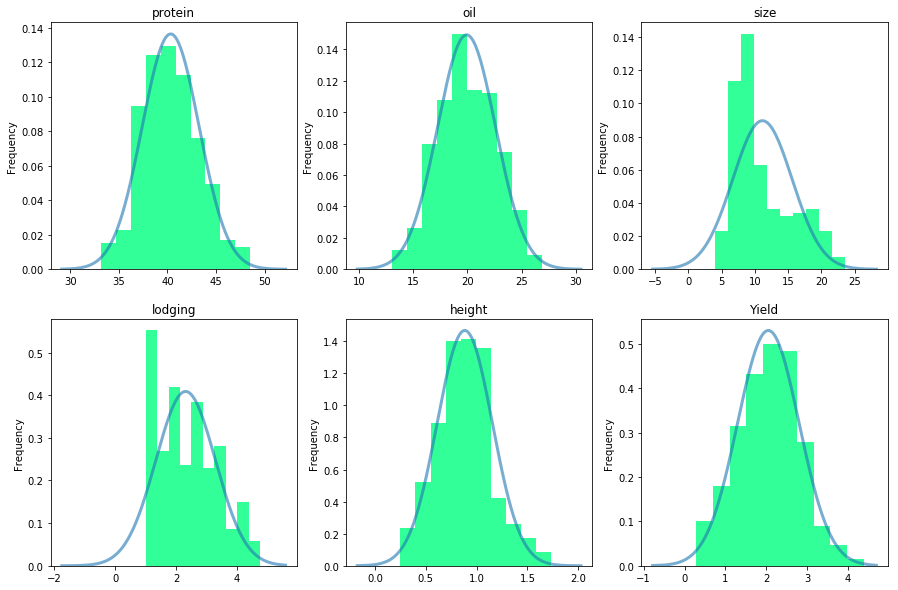

In [6]:
"""
Verificando a aderência dos dados à distribuição normal
(dos fatores: yield, height, lodging, size, protein, oil de todas as cidades como um conjunto)
"""

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
normal('protein')

plt.subplot(2,3,2)
normal('oil')

plt.subplot(2,3,3)
normal('size')

plt.subplot(2,3,4)
normal('lodging')

plt.subplot(2,3,5)
normal('height')

plt.subplot(2,3,6)
normal('Yield')


In [222]:
def normal2(dataset, datasetname, var, n1, n2):
    dataset['{}'.format(var)].plot.hist(color = "SpringGreen", alpha = 0.8, title = datasetname, normed = 1)
    y = sorted(stats.norm.rvs(size = 10000, loc = dataset['{}'.format(var)].mean(), scale = dataset['{}'.format(var)].std()))
    plt.plot(y, stats.norm.pdf(y, loc = dataset['{}'.format(var)].mean(), scale = dataset['{}'.format(var)].std()), lw = 3, alpha = 0.6)
    plt.xlim([n1,n2])

In [223]:
def normal3(var, n1, n2):
    plt.figure(figsize=(15,10))

    plt.subplot(2,3,1)
    normal2(dlawes, 'Lawes ' + '{}'.format(var), var, n1, n2)

    plt.subplot(2,3,2)
    normal2(dbrooksted, 'Brooksted ' + '{}'.format(var), var, n1, n2)

    plt.subplot(2,3,3)
    normal2(dnambour, 'Nambour ' + '{}'.format(var), var, n1, n2)

    plt.subplot(2,3,4)
    normal2(dredlandbay, 'RedLandBay ' + '{}'.format(var), var, n1, n2)

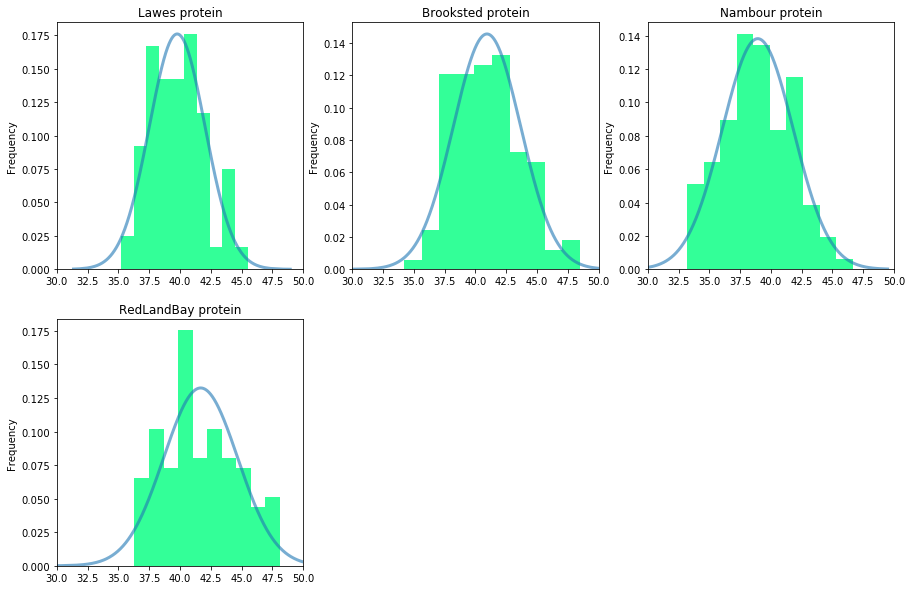

In [224]:
normal3('protein', 30, 50)

C:\Users\chend\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


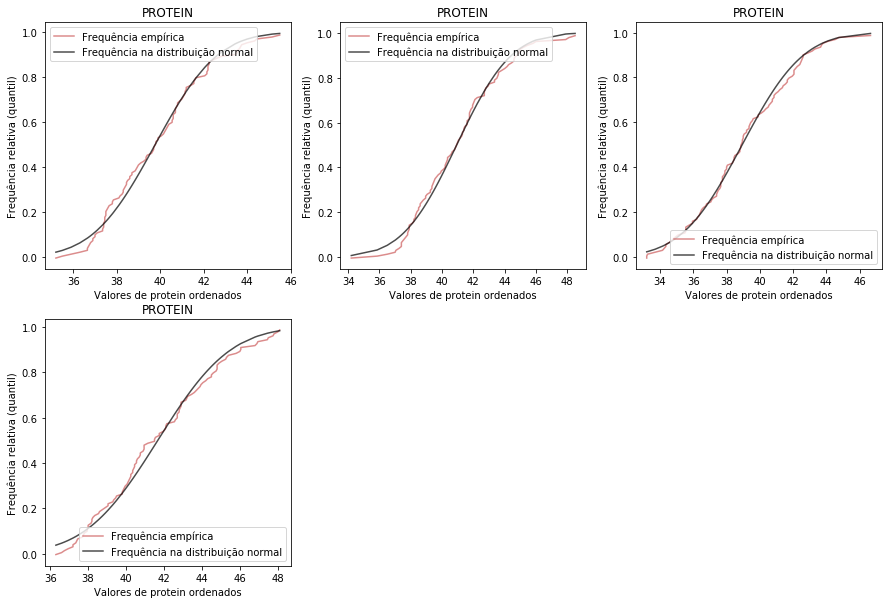

In [225]:
plt.figure(figsize=(15,10))
dlawes.protein = sorted(dlawes.protein)

freqrelat = []
for i in range(len(dlawes)):
    freqrelat.append ((i-0.5)/len(dlawes))

freqnormaloil = []
for i in dlawes.protein:
    freqnormaloil.append(stats.norm.cdf (i, loc = dlawes['protein'].mean(), scale = dlawes['protein'].std()))
 
plt.subplot(2,3,1)
plt.plot (dlawes['protein'], freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dlawes['protein'], freqnormaloil, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores de protein ordenados')
plt.title ('PROTEIN')

dbrooksted.protein = sorted(dbrooksted.protein)

freqrelat = []
for i in range(len(dbrooksted)):
    freqrelat.append ((i-0.5)/len(dbrooksted))

freqnormaloil = []
for i in dbrooksted.protein:
    freqnormaloil.append(stats.norm.cdf (i, loc = dbrooksted['protein'].mean(), scale = dbrooksted['protein'].std()))

plt.subplot(2,3,2)
plt.plot (dbrooksted['protein'], freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dbrooksted['protein'], freqnormaloil, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores de protein ordenados')
plt.title ('PROTEIN')

dnambour.protein = sorted(dnambour.protein)

freqrelat = []
for i in range(len(dnambour)):
    freqrelat.append ((i-0.5)/len(dnambour))

freqnormaloil = []
for i in dnambour.protein:
    freqnormaloil.append(stats.norm.cdf (i, loc = dnambour['protein'].mean(), scale = dnambour['protein'].std()))

plt.subplot(2,3,3)
plt.plot (dnambour['protein'], freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dnambour['protein'], freqnormaloil, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores de protein ordenados')
plt.title ('PROTEIN')

dredlandbay.protein = sorted(dredlandbay.protein)

freqrelat = []
for i in range(len(dredlandbay)):
    freqrelat.append ((i-0.5)/len(dredlandbay))

freqnormaloil = []
for i in dredlandbay.protein:
    freqnormaloil.append(stats.norm.cdf (i, loc = dredlandbay['protein'].mean(), scale = dredlandbay['protein'].std()))

plt.subplot(2,3,4)
plt.plot (dredlandbay['protein'], freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dredlandbay['protein'], freqnormaloil, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores de protein ordenados')
plt.title ('PROTEIN')

# Teste de hipótese

Serão realizados 6 testes de igualdade de médias, de modo a testar todas as cidades entre si. Analisando a quantidade de proteína provinda da soja produzida em cada uma das cidades, concluiremos quais fatores influenciam ou não na quantia de proteína.

Iremos considerar como hipótese nula (H0) que µ = µ0 e como hipótese alternativa (H1) que µ ≠ µ0.
H0 significa que a média de proteína das sojas dos quatro cidades são iguais, considerando o nível de significância igual a 5%.
Iremos fazer o teste com a diferença entre as duas médias, e se ela for igual a zero, não rejeitaremos a hipótese nula.

Iremos utilizar o nível de significancia de 0,01 com aproimadamente 40 graus de liberdade (t crítico~= 1,35 e -1,35)

In [213]:
#Gerando amostras

n = 20

amostralawes = []
for i in range(n):
    amostralawes.append(np.random.choice(dlawes.protein))

amostrabrooksted = []
for i in range(n):
    amostrabrooksted.append(np.random.choice(dbrooksted.protein))
    
amostranambour = []
for i in range(n):
    amostranambour.append(np.random.choice(dnambour.protein))
    
amostraredlandbay = []
for i in range(n):
    amostraredlandbay.append(np.random.choice(dredlandbay.protein))

In [214]:
#Calculando as médias e desvios padrões amostrais

medial = np.mean(amostralawes)
mediab = np.mean(amostrabrooksted)
median = np.mean(amostranambour)
mediar = np.mean(amostraredlandbay)

sigmal = np.std(amostralawes)
sigmab = np.std(amostrabrooksted)
sigman = np.std(amostranambour)
sigmar = np.std(amostraredlandbay)

### Teste 1 (Lawes e Brooksted)

In [215]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigmal**2)/n) + (sigmab**2)/n)**2)/((((sigmal**2)/n)**2)/(n-1) + (((sigmab**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (medial - mediab)/(((sigmal**2)/n) + (sigmab**2)/n)**0.5
print ('T observado para o teste 1:', tobs)

Graus de liberdade da distribuição t amostral: 36.1130543791
T observado para o teste 1: -0.285047516958


### Teste 2 (Lawes e Nambour)

In [216]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigmal**2)/n) + (sigman**2)/n)**2)/((((sigmal**2)/n)**2)/(n-1) + (((sigman**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (medial - median)/(((sigmal**2)/n) + (sigman**2)/n)**0.5
print ('T observado para o teste 2:', tobs)

Graus de liberdade da distribuição t amostral: 37.4688206364
T observado para o teste 2: 2.12089230893


### Teste 3 (Lawes e Redlandbay)

In [217]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigmal**2)/n) + (sigmar**2)/n)**2)/((((sigmal**2)/n)**2)/(n-1) + (((sigmar**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (medial - mediar)/(((sigmal**2)/n) + (sigmar**2)/n)**0.5
print ('T observado para o teste 3:', tobs)

Graus de liberdade da distribuição t amostral: 35.5614960111
T observado para o teste 3: -0.766135646709


### Teste 4 (Brooksted e Nambour)

In [218]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigmab**2)/n) + (sigman**2)/n)**2)/((((sigmab**2)/n)**2)/(n-1) + (((sigman**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (mediab - median)/(((sigmab**2)/n) + (sigman**2)/n)**0.5
print ('T observado para o teste 4:', tobs)

Graus de liberdade da distribuição t amostral: 34.0947505712
T observado para o teste 4: 2.13545996583


### Teste 5 (Brooksted e Redlandbay)

In [219]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigmab**2)/n) + (sigmar**2)/n)**2)/((((sigmab**2)/n)**2)/(n-1) + (((sigmar**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (mediab - mediar)/(((sigmab**2)/n) + (sigmar**2)/n)**0.5
print ('T observado para o teste 5:', tobs)

Graus de liberdade da distribuição t amostral: 37.952452137
T observado para o teste 5: -0.441415102093


### Teste 6 (Nambour e Redlandbay)

In [226]:
#Calculando graus de liberdade da distribuição amostral~t

grau1 = ((((sigman**2)/n) + (sigmar**2)/n)**2)/((((sigman**2)/n)**2)/(n-1) + (((sigmar**2)/n)**2)/(n-1))
print ('Graus de liberdade da distribuição t amostral:', grau1)

#Calculando T observado (ponto na distribuição T amostral baseado nos valores retirado das amostras)

tobs = (median - mediar)/(((sigman**2)/n) + (sigmar**2)/n)**0.5
print ('T observado para o teste 6:', tobs)

Graus de liberdade da distribuição t amostral: 33.4370702443
T observado para o teste 6: -2.59252223042


# Conslusão


De acordo com os cálculos, apenas as cidades de Brooksted e Redlandbay, Lawes e Redlandbay e Lawes e Brooksted tiveram as sojas produzidas com quantidades de proteína parecidas, rejeitando H1. Para todas as outras combinações de cidades, rejeitamos H0.

As quatro cidades estão localizadas muito perto uma da outra, o que, inicialmente, nos levaria a aconselhar o fornecedor a escolher qualquer lote de grãos de soja proveniente de qualquer uma das cidades, indiscriminadamente. Contudo, após a realização do teste de hipótese é possível perceber que há diferenças.

As diferenças entre os lotes de grãos de soja podem ser explicadas por variações não contempladas unicamente pelo clima, isto é, por exemplo, as condições de solo nas quais foi realizado o plantio. A fixação biológica de nitrogênio é um fator importante no conteúdo proteico e pode variar de solo para solo, mesmo que o clima das localidades seja muito parecido devido ao fato de elas serem geograficamente muito próximas.

## Referências

Basford, K. E., and Tukey, J. W. (1999). Graphical analysis of multiresponse data illustrated with a
plant breeding trial. Chapman and Hall/CRC.
Retrieved from: http://three-mode.leidenuniv.nl/data/soybeaninf.htm.
Used with permission of Kaye Basford, Pieter Kroonenberg.

K E Basford. 1982. The Use of Multidimensional Scaling in Analysing Multi-Attribute Genotype
Response Across Environments, Aust J Agric Res, 33, 473–480.
baker.barley.uniformity 21
Kroonenberg, P. M., & Basford, K. E. B. (1989). An investigation of multi-attribute genotype
response across environments using three-mode principal component analysis. Euphytica, 44, 109–
123.

http://www.portalaction.com.br/inferencia/572-2o-caso-variancias-desconhecidas-e-diferentes